In [ ]:
## Importing the MNIST Dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)  # Loads the dataset and splits it into training (60,000 images) and testing (10,000 images)

In [ ]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (60000, 28, 28), Test set shape: (10000, 28, 28)


In [32]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size=0.1, random_state=36)

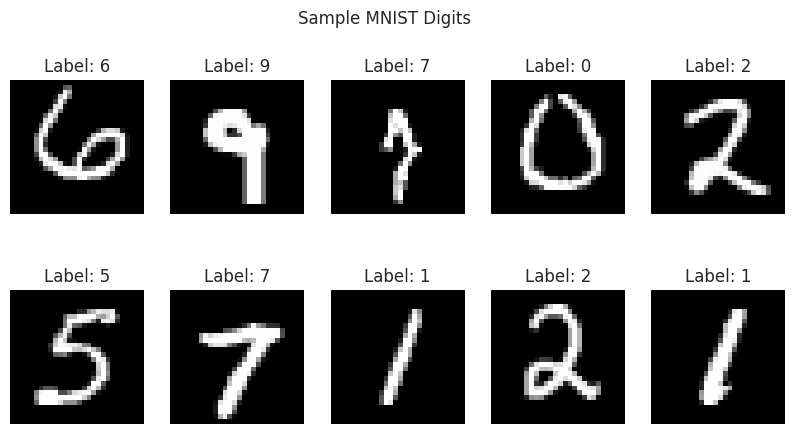

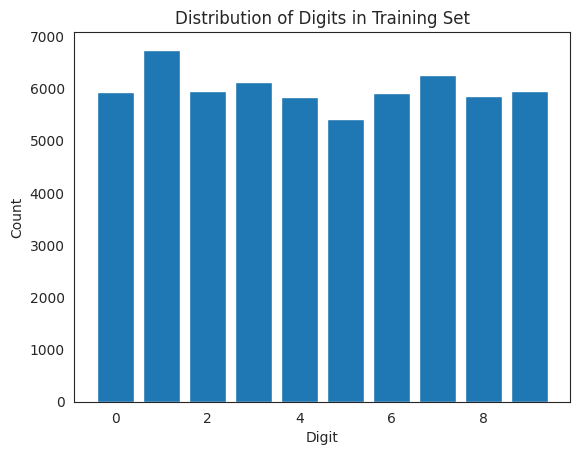

In [34]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train_cat[i])}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [35]:
model_1 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8653 - loss: 0.4722 - val_accuracy: 0.9722 - val_loss: 0.0987
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9769 - loss: 0.0788 - val_accuracy: 0.9792 - val_loss: 0.0731
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9851 - loss: 0.0497 - val_accuracy: 0.9825 - val_loss: 0.0584
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9896 - loss: 0.0350 - val_accuracy: 0.9843 - val_loss: 0.0508
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9926 - loss: 0.0267 - val_accuracy: 0.9847 - val_loss: 0.0549


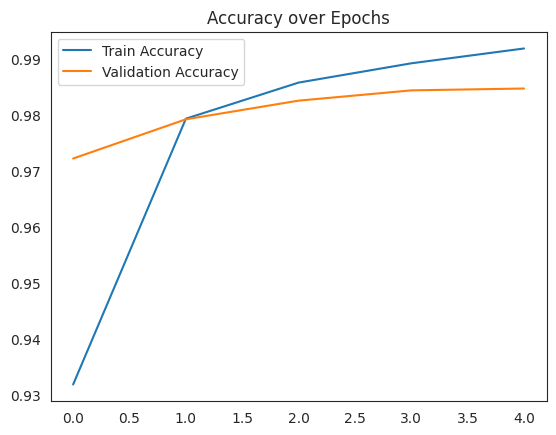

In [36]:
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


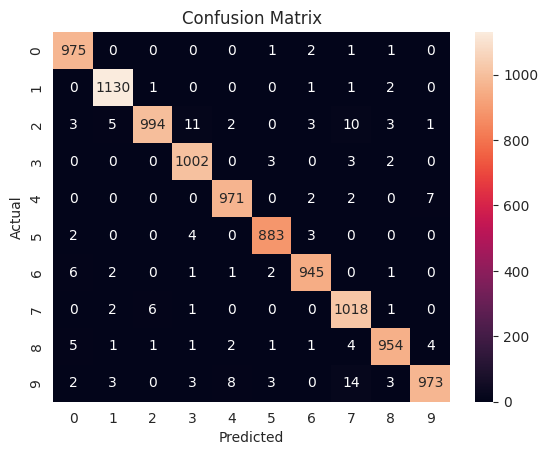

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [37]:
y_pred = model_1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_classes))

In [38]:
model_2 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_data=(X_val, y_val_cat))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.7916 - loss: 0.6526 - val_accuracy: 0.9742 - val_loss: 0.0772
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9673 - loss: 0.1124 - val_accuracy: 0.9802 - val_loss: 0.0575
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9759 - loss: 0.0785 - val_accuracy: 0.9845 - val_loss: 0.0452
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9802 - loss: 0.0636 - val_accuracy: 0.9873 - val_loss: 0.0421
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9840 - loss: 0.0546 - val_accuracy: 0.9885 - val_loss: 0.0383
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9886 - loss: 0.0392 - val_accuracy: 0.9898 - val_loss: 0.0349
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9891 - loss: 0.0351 - 